<a href="https://colab.research.google.com/github/ChangCorp/finalproject/blob/main/Stage_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder   
import pickle  
from pathlib import Path  

%matplotlib inline 
matplotlib.style.use('ggplot') 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ChangCorp/finalproject/main/train_delimited_comma.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 1. Descriptive Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Checking for missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# Checking duplicate record
df.duplicated().sum() 

0

In [8]:
cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
nums = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [10]:
df.groupby('pdays').agg({'pdays':['count']}).head()

,pdays
,count
pdays,
-1,36954
1,15
2,37
3,1
4,2


In [11]:
df.groupby('previous').agg({'pdays':['count']}).head()

,pdays
,count
previous,
0,36954
1,2772
2,2106
3,1142
4,714


## Insight Descriptive Statistics

**A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?**<br>
Dari semua informasi di atas, terlihat bahwa data tersebut memiliki 17 feature/ kolom. Tipe data untuk masing-masing kolom sudah sesuai. Antara nama kolom dengan isinya juga sudah sesuai.
<br>
<br>
**B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?**<br>
Dari 17 kolom tidak ada satupun yang memiliki nilai kosong, sehingga tidak perlu ada preprocessing untuk missing values.
<br>
<br>
**C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)**
<br>
`Kolom Numerik`<br>

`Age`: Untuk kolom age tidak terlihat potensi skewed karena mean (40.9) dan mediannya (39.0) tidak berbeda signifikan.
<br>

`Balance`: Untuk kolom balance terlihat nilai mean (1362.3) sangat jauh di atas mediannya (448.0). Nilai minimum balance memiliki nilai aneh, yaitu nilai yang minus sebesar -8019. Perlu dilakukan investigasi lanjutan terkait balance negatif.<br>

`Day`: Untuk kolom day terlihat mean (15.8) dan median (16.0) hampir sama. Kemudian nilai minimum, maksimum, kuartil 1 dan 3 terlihat normal. <br>

`Duration`: Untuk kolom duration terlihat bahwa nilai mean (258.2) lebih besar dari nilai median (180.0), ada potensi positive skew. <br>

`Campaign`: Untuk kolom campaign nampak adanya kecenderungan positive skew, di mana nilai mean (2.7) lebih besar dibanding nilai median (2.0). <br>

`Pdays`: Untuk kolom pdays terlihat data berkumpul di angka -1 (36954 dari 45211 records), yang artinya hampir semua client tidak pernah di hubungi sebelumnya. <br> 

`Previous`: Untuk kolom previous terlihat kebanyakan client (36954 dari 45211 records) memiliki nilai 0, yang artinya belum pernah menerima campaign sebelumnya.<br>
<br>
`Kolom Kategori`<br>

`Job` : terdapat 12 pekerjaan berbeda, mayoritas 'blue-collar' (21.5%).<br>

`Marital` : lebih dari 50% klien sudah menikah.<br>

`Education` : lebih dari 50% secondary.<br>

`Housing` : lebih dari 50% client memiliki pinjaman rumah.<br> 

`Loan` : mayoritas client tidak memiliki personal loan.<br>

`Contact` : lebih dari 50% client menggunakan telepon seluler. <br>

`Month` : paling banyak di bulan May saat melakukan campaign.<br>

`Poutcome` : ~80% memiliki value 'unknown'<br>

`y` : 88.3% client tidak membeli deposito. Kolom yang merupakan target ini memiliki class-imbalance.

# 2. Univariate Analysis

#### Numerical Data


##### Age

In [12]:
## Age ##

Q1_age = np.quantile(df['age'], .25)
Q3_age = np.quantile(df['age'], .75)
IQR_age = Q3_age - Q1_age
min_IQR_age = Q1_age - 1.5 * IQR_age
max_IQR_age = Q3_age + 1.5 * IQR_age
nilai_min_age = np.min(df['age'])
nilai_max_age = np.max(df['age'])

print('')
print('A. Mencari outlier dari kolom age')
print('1. nilai Q1 dari age =', Q1_age)
print('2. nilai Q3 dari age =', Q3_age)
print('3. nilai IQR dari age =', IQR_age)
print('4. nilai min IQR dari age =', min_IQR_age)
print('5. nilai max IQR dari age =', max_IQR_age)
print('6. nilai min dari age =', nilai_min_age)
print('7. nilai max dari age =', nilai_max_age)

if (nilai_min_age < min_IQR_age):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_age > max_IQR_age):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


A. Mencari outlier dari kolom age
1. nilai Q1 dari age = 33.0
2. nilai Q3 dari age = 48.0
3. nilai IQR dari age = 15.0
4. nilai min IQR dari age = 10.5
5. nilai max IQR dari age = 70.5
6. nilai min dari age = 18
7. nilai max dari age = 95
Tidak ditemukan low outlier!
Ditemukan high outlier!


##### Day

In [13]:
## Day ##

Q1_day = np.quantile(df['day'], .25)
Q3_day = np.quantile(df['day'], .75)
IQR_day = Q3_day - Q1_day
min_IQR_day = Q1_day - 1.5 * IQR_day
max_IQR_day = Q3_day + 1.5 * IQR_day
nilai_min_day = np.min(df['day'])
nilai_max_day = np.max(df['day'])

print('')
print('B. Mencari outlier dari kolom day')
print('1. nilai Q1 dari day =', Q1_day)
print('2. nilai Q3 dari day =', Q3_day)
print('3. nilai IQR dari day =', IQR_day)
print('4. nilai min IQR dari day =', min_IQR_day)
print('5. nilai max IQR dari day =', max_IQR_day)
print('6. nilai min dari day =', nilai_min_day)
print('7. nilai max dari day =', nilai_max_day)

if (nilai_min_day < min_IQR_day):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_day > max_IQR_day):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


B. Mencari outlier dari kolom day
1. nilai Q1 dari day = 8.0
2. nilai Q3 dari day = 21.0
3. nilai IQR dari day = 13.0
4. nilai min IQR dari day = -11.5
5. nilai max IQR dari day = 40.5
6. nilai min dari day = 1
7. nilai max dari day = 31
Tidak ditemukan low outlier!
Tidak ditemukan high outlier!


##### Balance

In [14]:
## Balance ##
Q1_balance = np.quantile(df['balance'], .25)
Q3_balance = np.quantile(df['balance'], .75)
IQR_balance = Q3_balance - Q1_balance
min_IQR_balance = Q1_balance - 1.5 * IQR_balance
max_IQR_balance = Q3_balance + 1.5 * IQR_balance
nilai_min_balance = np.min(df['balance'])
nilai_max_balance = np.max(df['balance'])

print('')
print('C. Mencari outlier dari kolom balance')
print('1. nilai Q1 dari balance =', Q1_balance)
print('2. nilai Q3 dari balance =', Q3_balance)
print('3. nilai IQR dari balance =', IQR_balance)
print('4. nilai min IQR dari balance =', min_IQR_balance)
print('5. nilai max IQR dari balance =', max_IQR_balance)
print('6. nilai min dari balance =', nilai_min_balance)
print('7. nilai max dari balance =', nilai_max_balance)

if (nilai_min_balance < min_IQR_balance):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_balance > max_IQR_balance):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


C. Mencari outlier dari kolom balance
1. nilai Q1 dari balance = 72.0
2. nilai Q3 dari balance = 1428.0
3. nilai IQR dari balance = 1356.0
4. nilai min IQR dari balance = -1962.0
5. nilai max IQR dari balance = 3462.0
6. nilai min dari balance = -8019
7. nilai max dari balance = 102127
Ditemukan low outlier!
Ditemukan high outlier!


##### Duration

In [15]:
## Duration ##

Q1_duration = np.quantile(df['duration'], .25)
Q3_duration = np.quantile(df['duration'], .75)
IQR_duration = Q3_duration - Q1_duration
min_IQR_duration = Q1_duration - 1.5 * IQR_duration
max_IQR_duration = Q3_duration + 1.5 * IQR_duration
nilai_min_duration = np.min(df['duration'])
nilai_max_duration = np.max(df['duration'])

print('')
print('D. Mencari outlier dari kolom duration')
print('1. nilai Q1 dari duration =', Q1_duration)
print('2. nilai Q3 dari duration =', Q3_duration)
print('3. nilai IQR dari duration =', IQR_duration)
print('4. nilai min IQR dari duration =', min_IQR_duration)
print('5. nilai max IQR dari duration =', max_IQR_duration)
print('6. nilai min dari duration =', nilai_min_duration)
print('7. nilai max dari duration =', nilai_max_duration)

if (nilai_min_duration < min_IQR_duration):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_duration > max_IQR_duration):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


D. Mencari outlier dari kolom duration
1. nilai Q1 dari duration = 103.0
2. nilai Q3 dari duration = 319.0
3. nilai IQR dari duration = 216.0
4. nilai min IQR dari duration = -221.0
5. nilai max IQR dari duration = 643.0
6. nilai min dari duration = 0
7. nilai max dari duration = 4918
Tidak ditemukan low outlier!
Ditemukan high outlier!


##### Campaign

In [16]:
# Campaign #

Q1_campaign = np.quantile(df['campaign'], .25)
Q3_campaign = np.quantile(df['campaign'], .75)
IQR_campaign = Q3_campaign - Q1_campaign
min_IQR_campaign = Q1_campaign - 1.5 * IQR_campaign
max_IQR_campaign = Q3_campaign + 1.5 * IQR_campaign
nilai_min_campaign = np.min(df['campaign'])
nilai_max_campaign = np.max(df['campaign'])

print('')
print('E. Mencari outlier dari kolom campaign')
print('1. nilai Q1 dari campaign =', Q1_campaign)
print('2. nilai Q3 dari campaign =', Q3_campaign)
print('3. nilai IQR dari campaign =', IQR_campaign)
print('4. nilai min IQR dari campaign =', min_IQR_campaign)
print('5. nilai max IQR dari campaign =', max_IQR_campaign)
print('6. nilai min dari campaign =', nilai_min_campaign)
print('7. nilai max dari campaign =', nilai_max_campaign)

if (nilai_min_campaign < min_IQR_campaign):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_campaign > max_IQR_campaign):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


E. Mencari outlier dari kolom campaign
1. nilai Q1 dari campaign = 1.0
2. nilai Q3 dari campaign = 3.0
3. nilai IQR dari campaign = 2.0
4. nilai min IQR dari campaign = -2.0
5. nilai max IQR dari campaign = 6.0
6. nilai min dari campaign = 1
7. nilai max dari campaign = 63
Tidak ditemukan low outlier!
Ditemukan high outlier!


##### Pdays

In [17]:
# Pdays #

Q1_pdays = np.quantile(df['pdays'], .25)
Q3_pdays = np.quantile(df['pdays'], .75)
IQR_pdays = Q3_pdays - Q1_pdays
min_IQR_pdays = Q1_pdays - 1.5 * IQR_pdays
max_IQR_pdays = Q3_pdays + 1.5 * IQR_pdays
nilai_min_pdays = np.min(df['pdays'])
nilai_max_pdays = np.max(df['pdays'])

print('')
print('F. Mencari outlier dari kolom pdays')
print('1. nilai Q1 dari pdays =', Q1_pdays)
print('2. nilai Q3 dari pdays =', Q3_pdays)
print('3. nilai IQR dari pdays =', IQR_pdays)
print('4. nilai min IQR dari pdays =', min_IQR_pdays)
print('5. nilai max IQR dari pdays =', max_IQR_pdays)
print('6. nilai min dari pdays =', nilai_min_pdays)
print('7. nilai max dari pdays =', nilai_max_pdays)

if (nilai_min_pdays < min_IQR_pdays):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_pdays > max_IQR_pdays):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


F. Mencari outlier dari kolom pdays
1. nilai Q1 dari pdays = -1.0
2. nilai Q3 dari pdays = -1.0
3. nilai IQR dari pdays = 0.0
4. nilai min IQR dari pdays = -1.0
5. nilai max IQR dari pdays = -1.0
6. nilai min dari pdays = -1
7. nilai max dari pdays = 871
Tidak ditemukan low outlier!
Ditemukan high outlier!


##### Previous

In [18]:
# Previous

Q1_previous = np.quantile(df['previous'], .25)
Q3_previous = np.quantile(df['previous'], .75)
IQR_previous = Q3_previous - Q1_previous
min_IQR_previous = Q1_previous - 1.5 * IQR_previous
max_IQR_previous = Q3_previous + 1.5 * IQR_previous
nilai_min_previous = np.min(df['previous'])
nilai_max_previous = np.max(df['previous'])

print('')
print('G. Mencari outlier dari kolom previous')
print('1. nilai Q1 dari previous =', Q1_previous)
print('2. nilai Q3 dari previous =', Q3_previous)
print('3. nilai IQR dari previous =', IQR_previous)
print('4. nilai min IQR dari previous =', min_IQR_previous)
print('5. nilai max IQR dari previous =', max_IQR_previous)
print('6. nilai min dari previous =', nilai_min_previous)
print('7. nilai max dari previous =', nilai_max_previous)

if (nilai_min_previous < min_IQR_previous):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_previous > max_IQR_previous):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


G. Mencari outlier dari kolom previous
1. nilai Q1 dari previous = 0.0
2. nilai Q3 dari previous = 0.0
3. nilai IQR dari previous = 0.0
4. nilai min IQR dari previous = 0.0
5. nilai max IQR dari previous = 0.0
6. nilai min dari previous = 0
7. nilai max dari previous = 275
Tidak ditemukan low outlier!
Ditemukan high outlier!


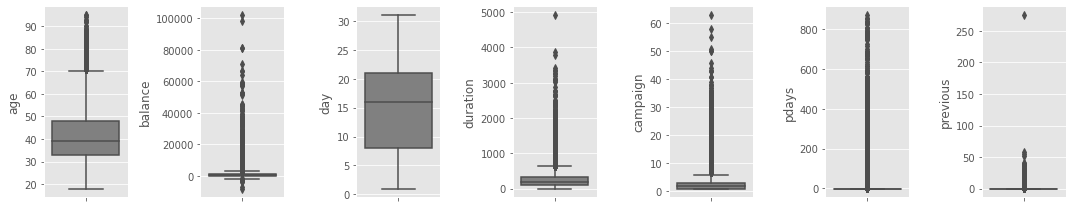

In [19]:
# Numerical Data Box Plot
plt.figure(figsize = (15,3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color = 'gray', orient = 'v')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

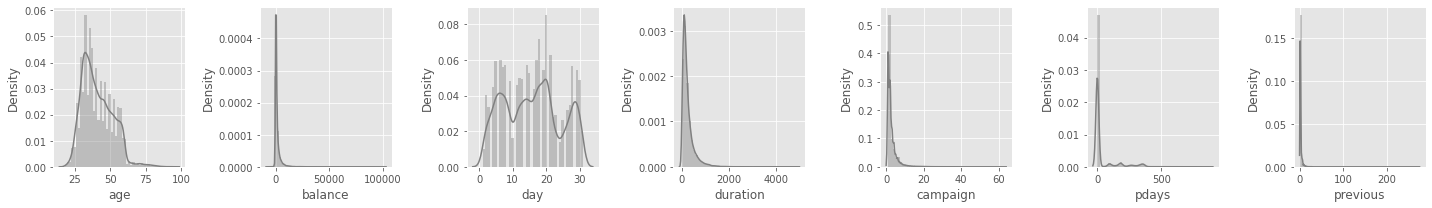

In [20]:
plt.figure(figsize = (20,3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.distplot(df[nums[i]], color = 'gray')
    plt.tight_layout()

#### Categorical Data

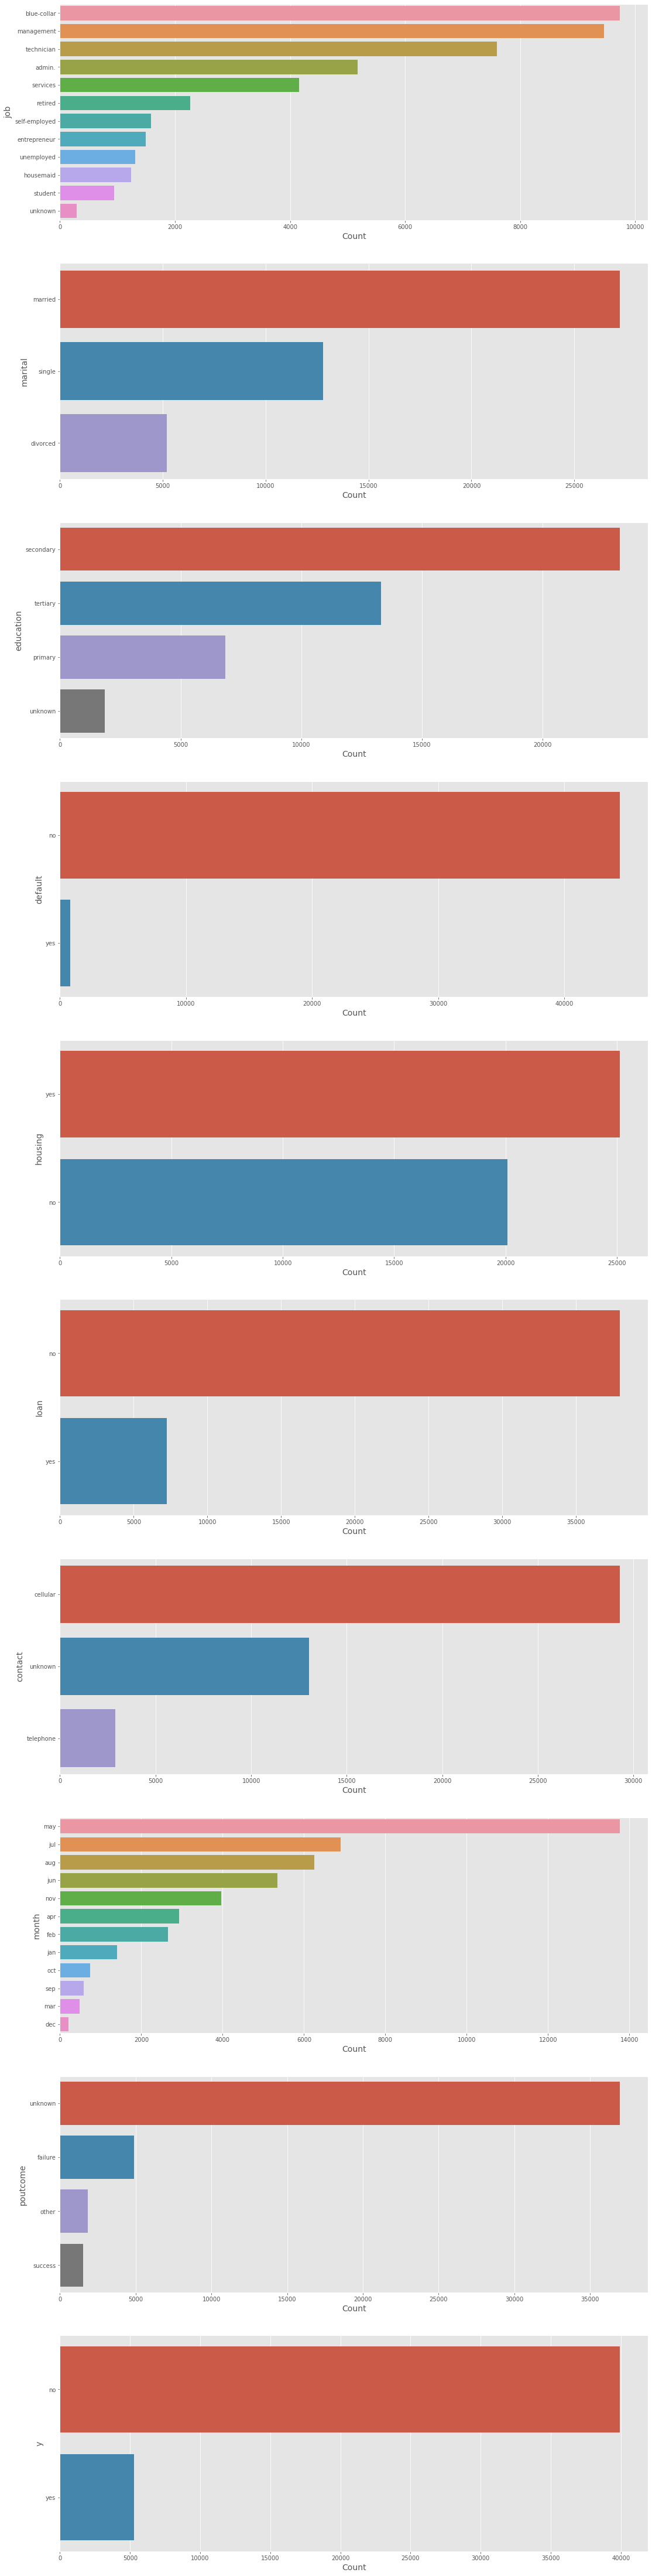

In [21]:
plt.figure(figsize=(18,80))
for idx, col in enumerate(cats):
    plt.subplot(10,1,idx + 1)
    ax = sns.countplot(data = df, y = df[col] ,order = df[col].value_counts().index);
    plt.ylabel(col, fontsize = 14)
    plt.xlabel('Count', fontsize = 14)

## Insight Univariate Analysis
Berdasarkan visualisasi dari distribusi tabel <br><br>

`Numerical` <br><br>

`Age`: <br>
1. slight skew positif = mean > modus/median
2. tidak ditemukan low outlier
3. ditemukan high outlier = ada yang nilainya jauh diatas normal
<br>

`Day` : <br>
1. multimodal distribution
2. tidak ditemukan low outlier dan high outlier
<br>

`Balance` : <br>
1. skew positif = mean > modus/median
2. ditemukan low outlier = ada yang nilainya jauh dibawah normal
3. ditemukan high outlier = ada yang nilainya jauh diatas normal
<br>

`Duration` : <br>
1. skew positif = mean > modus/median
2. tidak ditemukan low outlier = tidak ada yang nilainya jauh dibawah normal
3. ditemukan high outlier = ada yang nilainya jauh diatas normal
<br>

`Campaign` : <br>
1. skew positif = mean > modus/median
2. tidak ditemukan low outlier = tidak ada yang nilainya jauh dibawah normal
3. ditemukan high outlier = ada yang nilainya jauh diatas normal
<br>

`Pdays` : <br>
1. skew positif = mean > modus/median
2. tidak ditemukan low outlier = tidak ada yang nilainya jauh dibawah normal
3. ditemukan high outlier = ada yang nilainya jauh diatas normal
<br>

`Previous` : <br>
1. skew positif = mean > modus/median
2. tidak ditemukan low outlier = tidak ada yang nilainya jauh dibawah normal
3. ditemukan high outlier = ada yang nilainya jauh diatas normal
<br><br>

`Categorical`
<br>
<br>
`Job` : Terdapat 12 kategori, kemungkinan terlalu banyak (perlu grouping). Top 3 nya ‘blue-collar’, ‘management’, dan ‘technician’ (masing-masing memiliki nilai di atas 7000 records). Terdapat ‘unknown’ job dengan jumlah records di bawah 500
<br>
`Marital` : ‘married’ menempati posisi tertinggi dengan jumlah records > 25,000, ‘single’ dan ‘divorced’ berada pada posisi kedua dan ketiga. Possibly pada tahap pre-processing dilakukan grouping menjadi married_flag 'yes' and 'no'.
<br>
`Education` : ‘secondary’ menempati posisi tertinggi dengan > 20,000 records, diikuti dengan ‘tertiary’, ‘primary’, dan ‘unknown’. ‘unknown’ < 2,500 records. Pada tahap preprocessing kemungkinan dilakukan label encoding.
<br>
`Default` : hampir semua records memiliki value ‘no’
<br>
`Housing` : posisi pertama ‘yes’ dengan jumlah record sekitar 25,000, sisanya ‘no’. distribusi keduanya cukup seimbang
<br>
`Loan` : ‘no’ menempati posisi pertama (jumlah record > 35,000), sisanya ‘yes’
<br>
`Contact` : ‘cellular’ menempati posisi pertama (jumlah record > 25,000), siikuti ‘unknown’ dan ‘telephone’. Jumlah ‘unknown’ cukup banyak, sekitar 13,000 records, kemungkinan memerlukan penyesuaian pada tahap pre-processing.
<br>
`Month` : ‘may’ menempati posisi pertama (jumlah record > 12,000), diikuti ‘jul’ dan ‘aug’
<br>
`Poutcome` : ‘unknown’ menempati posisi tertinggi dengan jumlah record > 35,000. Jumlah ‘success’ < 2,500
<br>
`y` : ‘no’ berada di posisi tertinggi, dengan jumlah record sekitar 40,000. ‘yes’ sekitar 5,000 record. Kolom yang merupakan target ini memiliki class-imbalance, kemungkinan besar akan dilakukan oversampling pada tahap selanjutnya.

# 3. Multivariate Analysis

## Numerical Correlation Heatmap

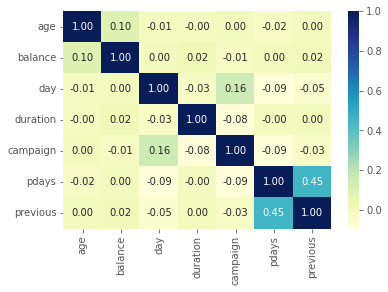

In [22]:
# Between numerical data
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')

In [23]:
# Atribut 'y' diubah menjadi bilangan biner dengan keterangan 1 = 'yes' dan 0 = 'no'
df1 = pd.read_csv('https://raw.githubusercontent.com/ChangCorp/finalproject/main/train_delimited_comma.csv')
df1['y'] =  df1["y"].map({'yes' : 1, 'no' : 0})
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


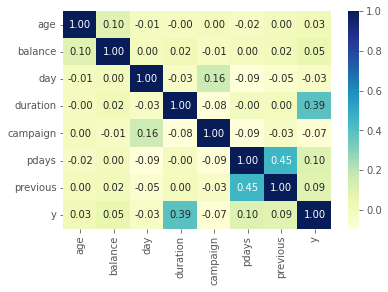

In [24]:
sns.heatmap(df1.corr(), cmap='YlGnBu', annot=True, fmt='.2f')

### Quotation for correlation
Interpretasi korelasi antar dua variabel
(Sarwono:2006)

>0 : Tidak ada korelasi antara dua variabel<br>
>0 – 0,25 : Korelasi sangat lemah<br>
>0,25 – 0,5 : Korelasi cukup<br>
>0,5 – 0,75 : Korelasi kuat<br>
>0,75 – 0,99 : Korelasi sangat kuat<br>
1 : Korelasi hubungan sempurna positif<br>
-1 : Korelasi hubungan sempurna negatif<br>

### Insight Heatmap Correlation
 * `y` sebagai variabel target / variabel dependent / label, `y` adalah variabel yang ingin diprediksi dari variabel bebas lainnya.
 * Tidak ada korelasi yang kuat antara target `y` dengan feature numerikal yang ada, mengindikasikan penggunaan model non-linear lebih tepat untuk dataset ini. Nilai korelasi tertinggi target-feature ada pada `y` dengan `duration`, yaitu 0.39 (tidak cukup kuat).
 * Kemungkinan besar tidak ada data yang redundant (tidak ada 2 feature yang memiliki korelasi dengan nilai >0.7). Korelasi antar feature paling tinggi ada pada `pdays` dan `previous` (0.45). Dari hasil univariate analysis sebelumnya, diketahui pada sample data mayoritas client belum mendapat campaign, sehingga ber-value -1 pada `pdays` dan 0 pada `previous`. Kemungkinan besar hal ini menyebabkan tingginya nilai korelasi antara kedua feature tersebut

### Pairplot

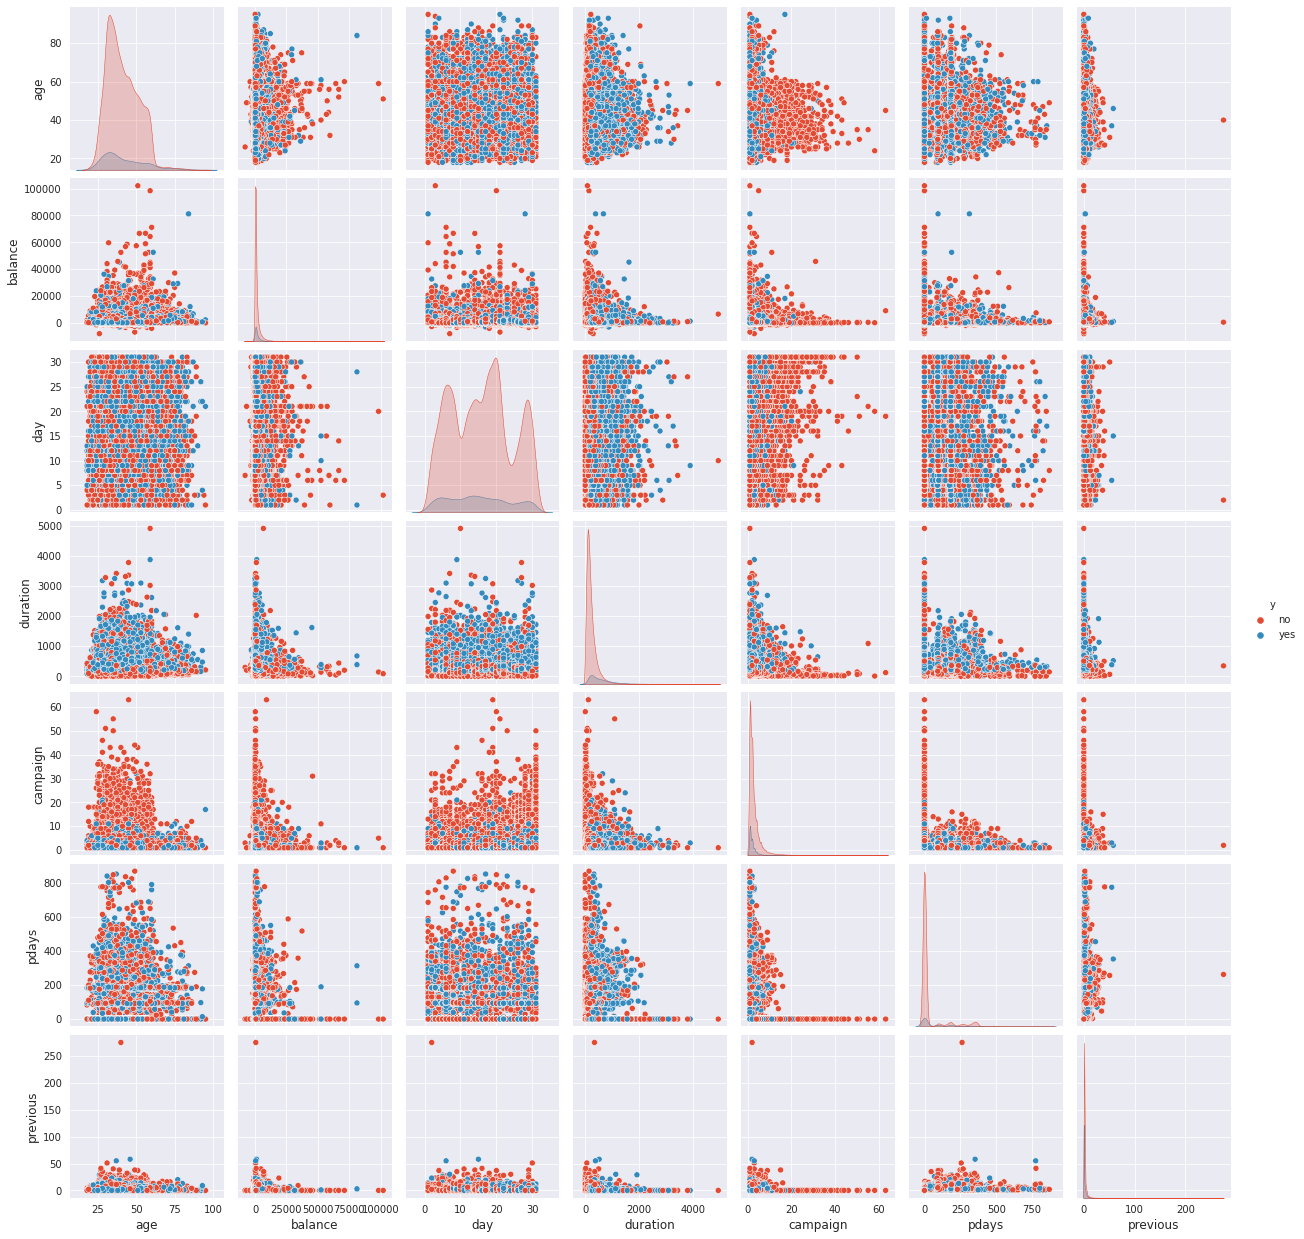

In [25]:
#Pairplot with sample 500
sns.set_style("darkgrid")
sns.pairplot(df, diag_kind='kde', hue='y')

Berdasarkan grafik diatas dapat disimpulkan bahwa :

1. Pada sample, client yang memiliki umur dibawah 60 tahun lebih banyak untuk dihubungi selama campaign
2. Pada sample, client yang memiliki rata-rata saldo tahunan dibawah 20.000 euro lebih banyak dihubungi selama campaign
3. Lama durasi telemarketer menghubungi client pada masa campaign kurang dari 1000 detik atau sekitar kurang dari 16 menit
4. Sebagian besar client yang membuka akun deposito memiliki durasi telfon relatif lebih lama dari pada yang tidak membuka akun deposito.

## Category Plot

In [26]:
#Penambahan kolom 'age_group'

df1.loc[df1['age']<20, 'age_group'] = '<20'
df1.loc[df1['age'].between(21,30), 'age_group'] = '21-30'
df1.loc[df1['age'].between(31,40), 'age_group'] = '31-40'
df1.loc[df1['age'].between(41,50), 'age_group'] = '41-50'
df1.loc[df1['age'].between(51,60), 'age_group'] = '51-60'
df1.loc[df1['age'].between(61,70), 'age_group'] = '61-70'
df1.loc[df1['age']>70, 'age_group'] = '>70'

df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,51-60
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,41-50
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,31-40
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,41-50
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,51-60
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,>70
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,>70
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,51-60


In [27]:
cats_categorical=['job','marital','default','education','housing','loan','contact','age_group','poutcome']

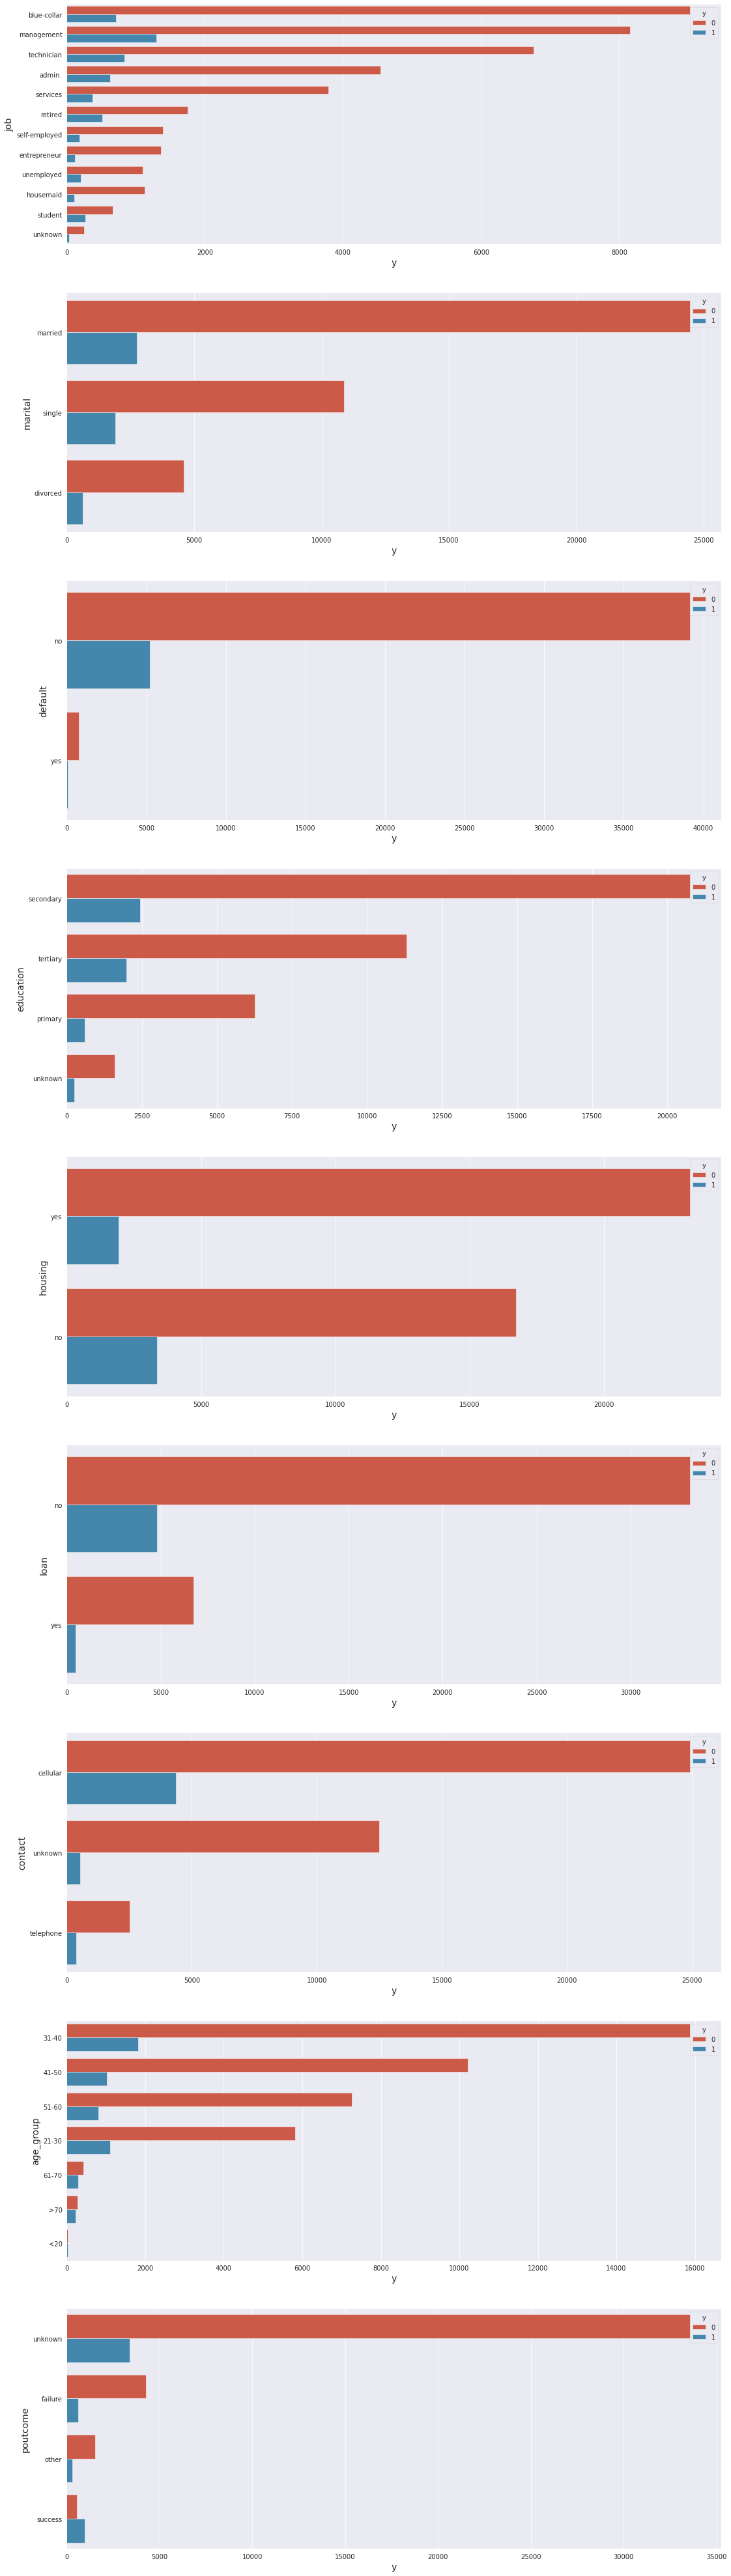

In [28]:
plt.figure(figsize=(18,80))
for idx, col in enumerate(cats_categorical):
    plt.subplot(10,1,idx + 1)
    ax = sns.countplot(data = df1, y = df1[col] , hue = df1['y'], order = df1[col].value_counts().index);
    plt.ylabel(col, fontsize = 14)
    plt.xlabel('y', fontsize = 14)

In [29]:
#Penambahan kolom 'balance_group'
#Negative balance mungkin berarti memiliki pinjaman/hutang. Kemungkinan besar bukan salah input data, karena jumlahnya ada sekitar 7000 record

df1.loc[df1['balance']==0, 'balance_group'] = 'zero_balance'
df1.loc[df1['balance']>0, 'balance_group'] = 'positive_balance'
df1.loc[df1['balance']<0, 'balance_group'] = 'negative_balance'


In [30]:
df1.groupby(['balance_group','y']).agg({'balance_group':['count']})

balance_group
                           count
balance_group    y              
negative_balance 0          3556
                 1           210
positive_balance 0         33144
                 1          4787
zero_balance     0          3222
                 1           292

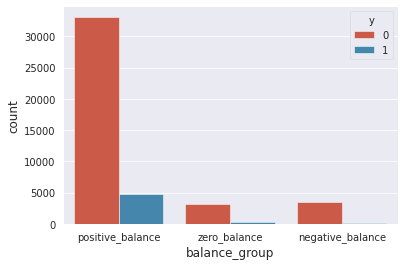

In [31]:
sns.countplot(data=df1,x='balance_group',hue='y')

### Category vs Target - KDE Plot


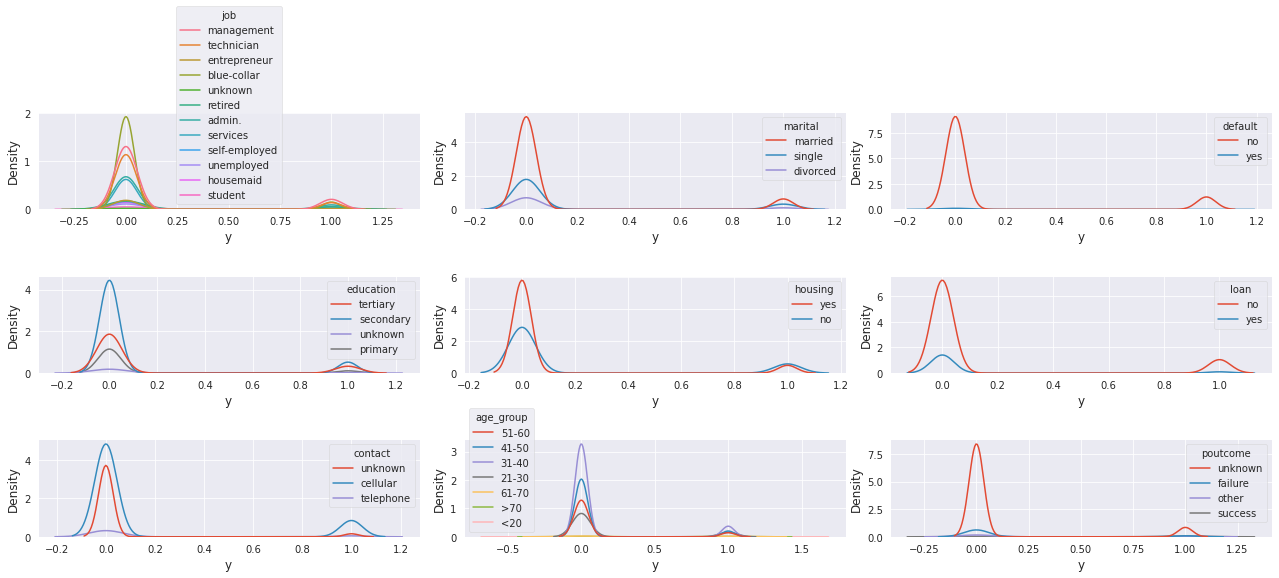

In [32]:
# melihat hubungan fitur-fitur kategorikal dengan calon target pemodelan (y)
plt.figure(figsize = (18, 8))

for i in range(0, len(cats_categorical)):
    plt.subplot(3, 3, i+1) 
    sns.kdeplot(data=df1, x='y', hue=cats_categorical[i])
    #plt.xlabel(features[i])
    plt.tight_layout()

### Insight Category Plot

Berdasarkan visualisasi diatas dapat disimpukan bahwa client yang membuka akun deposito memiliki kecenderungan kategorik sebagai berikut:
1. memiliki job management, technician dan blue-collar 
2. memiliki status menikah
3. tidak pernah gagal membayar cicilan (default = ‘no’)
4. memiliki tingkat pendidikan lanjutan: secondary dan tertiary
5. tidak memiliki cicilan personal
6. dikontak melalui telepon selular
7. age group 21-60 (usia produktif)
8. memiliki rata-rata balance positif (negative balance mungkin mengindikasikan ybs memiliki hutang, rata-rata saldo zero dapat mengindikasikan ybs menggunakan akun banknya hanya untuk transaksi dan tidak ada uang berlebih)



## Insight Multivariate Analysis
**A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?**
<br>
Korelasi antar feature numerik dengan target
 * `y` sebagai variabel target / variabel dependent / label, `y` adalah variabel yang ingin diprediksi dari variabel bebas lainnya.
 * Tidak ada korelasi yang kuat antara target `y` dengan feature numerikal yang ada, mengindikasikan penggunaan model non-linear lebih tepat untuk dataset ini. Nilai korelasi tertinggi target-feature ada pada `y` dengan `duration`, yaitu 0.39 (tidak cukup kuat).
<br>

Hubungan antar feature kategorikal dengan target
 * Klien yang paling tertarik dengan produk deposito adalah klien dengan status <br>
  a. menikah<br>
  b. pendidikan lanjutan 'secondary' dan 'tertiary'<br>
  c. tidak memiliki pinjaman KPR<br>
  d. tidak memiliki hutang di bank (personal loan)<br>
  e. dikontak menggunakan celullar/HP <br>
  f. tidak pernah gagal membayar hutang (default = 'no')<br>
  g. memiliki rata-rata balance positif (negative balance mungkin mengindikasikan ybs memiliki hutang, rata-rata saldo zero dapat mengindikasikan ybs menggunakan akun banknya hanya untuk transaksi dan tidak ada uang berlebih)

Dari penjabaran plot multivariat numerik dan kategorikal di atas, semua feature numerik dan kategorikal akan dipertahankan untuk modeling iterasi pertama. 
<br>
<br>

**B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?**<br>

 * Terdapat korelasi positif dari feature numerik yang cukup kuat (0.45), yaitu antara `pdays` dengan `previous`. Dari hasil univariate analysis sebelumnya, diketahui pada sample data mayoritas client belum mendapat campaign, sehingga ber-value -1 pada `pdays` dan 0 pada `previous`. Kemungkinan besar hal ini menyebabkan tingginya nilai korelasi antara kedua feature tersebut <br>
 * Dari heatmap korelasi feature numerik tidak ada feature pasangan dengan nilai korelasi >0.7, kemungkinan besar tidak ada data yang redundant.

# 4. Business Insight




Dari hasil EDA yang dilakukan, terdapat beberapa quick insights yang bisa dipertimbangkan dalam upaya meningkatkan performa campaign term-deposit oleh telesales:
<br>
1. Secara umum, client yang tertarik dengan produk deposito adalah klien dengan karakteristik <br>
  a. usia produktif: 20-60
  b. menikah<br>
  c. pendidikan lanjutan 'secondary' dan 'tertiary'<br>
  d. tidak memiliki cicilan rumah<br>
  e. tidak memiliki hutang di bank<br>
Tim Marketing dapat memusatkan effort terhadap orang-orang dengan karakteristik seperti di atas. 

2. Pendidikan. Dari grafik di bawah dapat dilihat bahwa mayoritas client yang sign-up untuk term-deposit memiliki pendidikan lanjutan (secondary dan tertiary). Jika dilihat stacked bar 100% (proporsi yang mengambil term-deposit untuk tiap jenjang pendidikan), % yes meningkat seiring dengan bertambah tingginya pendidikan. Tim marketing mungkin bisa memberikan approach yang berbeda kepada client dengan pendidikan lebih rendah, yaitu dengan menjelaskan manfaat term-deposit menggunakan bahasa yang mudah dipahami.

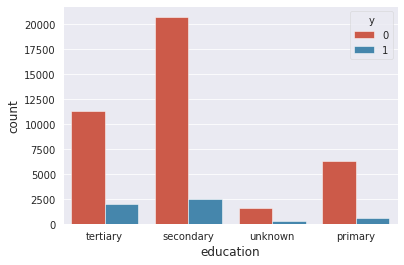

In [33]:
sns.countplot(data=df1,x='education',hue='y')

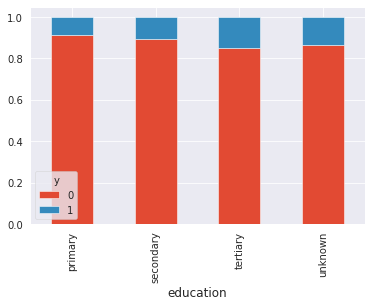

In [34]:
# Stack bar 100% - Education
df1.groupby('education')['y'].value_counts(normalize=True).unstack('y').plot.bar(stacked=True)

3. Jenis pekerjaan. Setelah dilakukan pengelompokan jenis pekerjaan, dari plot di bawah dapat dilihat client yang mengambil term-deposit mayoritas memiliki pekerjaan: blue-collar, management. Namun demikian, jika dilihat % yes dari masing-masing pekerjaan, % yes blue-collar relatif rendah. Jika sample menggambarkan populasi, maka kemungkinan banyak client bank yang memiliki pekerjaan blue-collar. Tim marketing perlu re-assess apakah product term-deposit dan approach yang dilakukan sudah tepat untuk segment ini.

  Terlihat % yes untuk student dan retired lebih tinggi dibanding job group lain. Pengamatan ini dapat dijadikan basis agar tim marketing dapat merancang product dan marketing approach yang lebih menarik lagi untuk student dan retired. Diharapkan dengan adanya product yang lebih tailored untuk 2 segment ini, akan ada akuisisi baru dan kedua segment bisa bertambah besar

  % yes untuk entrepreneur pun relatif rendah. Segment ini kemungkinan besar memerlukan modal usaha. Nampak dari visualisasi 3C bahwa hampir 20% entrepreneur memiliki personal loan (relatif lebih tinggi dibanding segment lain). Sebaiknya tim marketing mempertimbangkan apakah lebih menguntungkan dan menarik bila segment ini difokuskan untuk ditawarkan loan

In [35]:
#Penambahan kolom 'job_group'

df1.loc[df1['job']=='blue-collar', 'job_group'] = 'blue-collar'
df1.loc[df1['job']=='technician', 'job_group'] = 'blue-collar'
df1.loc[df1['job']=='admin', 'job_group'] = 'blue-collar'
df1.loc[df1['job']=='services', 'job_group'] = 'blue-collar'
df1.loc[df1['job']=='housemaid', 'job_group'] = 'blue-collar'
df1.loc[df1['job']=='management', 'job_group'] = 'management'
df1.loc[df1['job']=='self-employed', 'job_group'] = 'entrepreneur'
df1.loc[df1['job']=='entrepreneur', 'job_group'] = 'entrepreneur'
df1.loc[df1['job']=='unemployed', 'job_group'] = 'unemployed'
df1.loc[df1['job']=='student', 'job_group'] = 'student'
df1.loc[df1['job']=='retired', 'job_group'] = 'retired'
df1.loc[df1['job']=='unknown', 'job_group'] = 'unknown'

df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,balance_group,job_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,51-60,positive_balance,management
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,41-50,positive_balance,blue-collar
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,31-40,positive_balance,entrepreneur
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,41-50,positive_balance,blue-collar
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,31-40,positive_balance,unknown


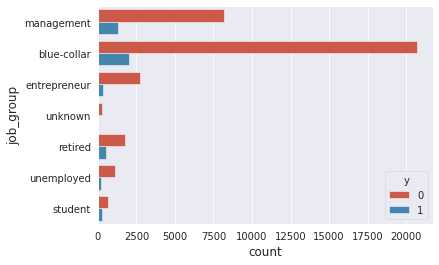

In [36]:
# Plot 3A
sns.countplot(data=df1,y='job_group',hue='y')

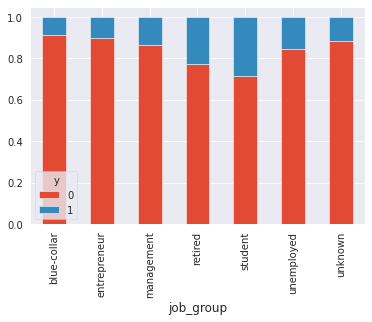

In [37]:
# Plot 3B
# Stack bar 100% - Job Group
df1.groupby('job_group')['y'].value_counts(normalize=True).unstack('y').plot.bar(stacked=True)

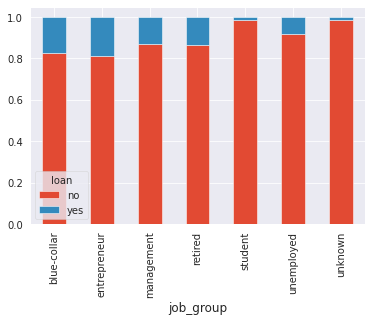

In [40]:
# Plot 3C
df1.groupby('job_group')['loan'].value_counts(normalize=True).unstack('loan').plot.bar(stacked=True)

 4. Average yearly balance. Untuk performa campaign yang lebih baik, sebaiknya orang-orang dengan average yearly balance negative diexclude dari whitelist telemarketing campaign. Selain % yes take up term-depositnya paling rendah dibanding 2 segment lain (visualisasi 4A), sekitar 70% dari orang2 ini memiliki housing loan dan 30% memiliki personal loan (vis 4B dan 4C). Adanya loan mengindikasikan rendah atau tidak adanya 'cold money' yang bisa digunakan untuk investasi (seperti pada term-deposit).

 Sementara itu, client dengan average yearly balance = 0 mengindikasikan bahwa akun mereka lebih bersifat transaksional. Client hanya akan menambah saldo ketika perlu melakukan pembayaran atau transfer. Client seperti ini mungkin memiliki 'cold money' di insititusi lain. Jika kita bisa memperoleh data biro (seperti SLIK) yang mengcompile data asset dan liability client di insititusi lain, kita dapat membuat program untuk menarik minat mereka agar berinvestasi pada bank kita.

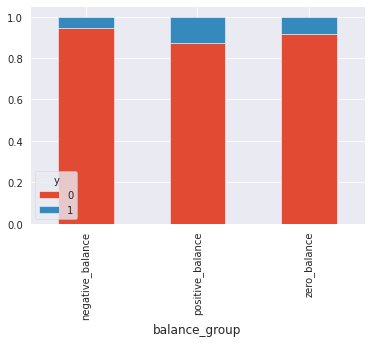

In [48]:
# Plot 4A
df1.groupby('balance_group')['y'].value_counts(normalize=True).unstack('y').plot.bar(stacked=True)

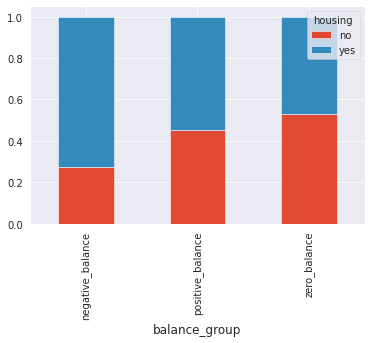

In [43]:
# Plot 4B
df1.groupby('balance_group')['housing'].value_counts(normalize=True).unstack('housing').plot.bar(stacked=True)

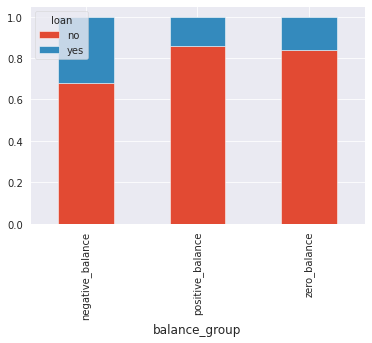

In [44]:
# Plot 4C
df1.groupby('balance_group')['loan'].value_counts(normalize=True).unstack('loan').plot.bar(stacked=True)